In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import scipy
from skimage.transform import resize
import nibabel as nib

from torch_vis import * # all relevant code in torch_vis.py

Relevant functions/classes from `torch_vis`:
- `ClassificationModel2D`: PET model/architecture (taken from Ben's code)
- `get_saliency`: function for making saliency maps
- `lrp_image`: function for making LRP importance maps

In [2]:
# load PET image of healthy brain
im = np.array(nib.load("data/img.nii").get_fdata())

# get slice 58, reshape so it fits model input
img = im[:,:,58]
img = np.pad(img, ((11, 10), (3, 2)), mode="edge")
img = resize(img, (160, 160))

# make image play nice with pytorch
# turn to tensor & add extra dims to front
torch_img = torch.Tensor(img).unsqueeze(0).unsqueeze(0)

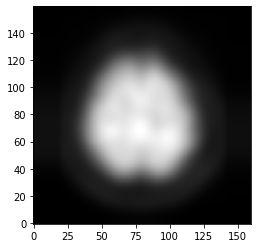

In [3]:
# visualize original image 
plt.imshow(img.T, cmap="gray", origin="lower")

In [4]:
# load model
model = ClassificationModel2D()
model.load_state_dict(torch.load("models/pet/2D_slice_58"))

<All keys matched successfully>

## Saliency Map

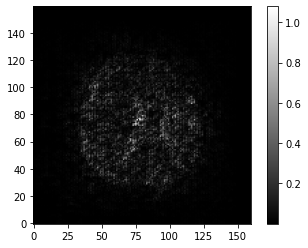

In [5]:
# first get saliency array (abs.value of gradients)
sal = get_saliency(model, torch_img)

# plot saliency map
plt.imshow(sal.T, cmap="gray", origin="lower")
plt.colorbar();

Shows that the model is just "looking at" the brain (not the surrounding blank space), but very noisy within the brain

## Layer-wise Relevance Propagation (LRP)

Hence, if in any layer only positive contributions exist, the overall relevance will not be conserved.



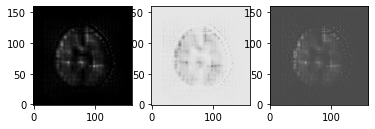

In [6]:
# example with beta = 0, 0.25, 0.5
betas = [0.0, 0.25, 0.5]
for i in range(3):
    plt.subplot(1, 3, i+1)
    lrp_out = lrp_image(model, torch_img, beta = betas[i])
    plt.imshow(lrp_out.T, cmap="gray", origin="lower")

Hence, if in any layer only positive contributions exist, the overall relevance will not be conserved.



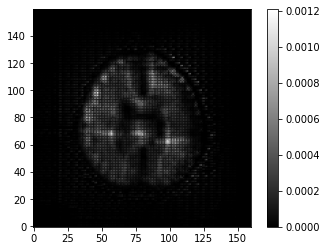

In [7]:
# close-up of beta=0
lrp_out = lrp_image(model, torch_img, beta = 0)
plt.imshow(lrp_out.T, cmap="gray", origin="lower")
plt.colorbar();

Much cleaner result than the saliency map; can actually clearly see some brain structures, including possibly the hypothalamus in the middle(?)